<h1 align='center'> Reducción de dimensión </h1>

<h2> Introducción </h2>
    
La reducción de dimensión es un proceso en el campo de la ciencia de datos y el aprendizaje automático que se utiliza para disminuir el número de variables aleatorias bajo consideración, obteniendo un conjunto de variables principales. Este proceso se puede llevar a cabo mediante diversas técnicas matemáticas y algorítmicas que buscan preservar la mayor cantidad posible de información original.

La reducción de dimensión se refiere a la técnica de transformar datos de alta dimensionalidad en un espacio de menor dimensión, de manera que se retenga la mayor cantidad posible de variabilidad (información relevante) presente en los datos originales.

**Importancia en el Machine Learning:**

- Mejora del Rendimiento: Los algoritmos de aprendizaje automático suelen ser más eficientes y rápidos con datos de menor dimensión. La reducción de dimensiones puede acelerar el entrenamiento y la predicción.

- Reducción del Ruido: Al eliminar características redundantes o irrelevantes, se mejora la calidad de los datos, lo que puede llevar a modelos más precisos.

- Prevención del Sobreajuste: Disminuir el número de características puede ayudar a evitar el sobreajuste, ya que los modelos con menos parámetros tienden a generalizar mejor en datos nuevos.

- Visualización: Los datos en alta dimensión son difíciles de visualizar. La reducción de dimensión permite representar los datos en 2D o 3D, facilitando su análisis y comprensión.

**Aplicaciones:**

- Análisis Exploratorio de Datos: Utilizado para visualizar y entender la estructura subyacente de los datos.

- Preprocesamiento de Datos: Como paso previo en la construcción de modelos predictivos, para mejorar la calidad y eficiencia del modelado.

- Compresión de Datos: En áreas como el procesamiento de imágenes y señales, donde se requiere reducir la cantidad de datos sin perder información esencial.

- Filtración de Ruido: Para mejorar la calidad de datos en áreas como la bioinformática, donde las mediciones pueden ser ruidosas.

- Reconocimiento de Patrones: En aplicaciones de reconocimiento facial y de voz, donde se necesita reducir la dimensionalidad de los datos para mejorar la precisión y velocidad del reconocimiento.

<h2> Maldición de la dimensionalidad </h2>

La "maldición de la dimensionalidad" es un término acuñado por el matemático Richard Bellman en la década de 1960 para describir los diversos fenómenos problemáticos que surgen al analizar y organizar datos en espacios de alta dimensión. Esta maldición afecta tanto a los datos como a los algoritmos que los procesan, presentando desafíos únicos en el campo de la ciencia de datos y el aprendizaje automático. A medida que aumenta la cantidad de dimensiones, el volumen del espacio crece de manera exponencial, lo que hace que los datos sean más dispersos. Esta dispersión puede provocar que cualquier análisis o procesamiento sea computacionalmente costoso y menos efectivo.

### Problemas Asociados:
- **Sparsity (Escasez de Datos)**: En alta dimensionalidad, los datos tienden a estar más dispersos, lo que significa que se necesita una cantidad exponencialmente mayor de datos para cubrir el espacio de manera adecuada. Esto puede dificultar la identificación de patrones o relaciones significativas.
   
- **Distancia y Similitud**: En espacios de alta dimensión, las métricas de distancia (como la distancia euclidiana) se vuelven menos informativas. Todas las distancias entre puntos tienden a parecer similares, lo que dificulta la discriminación entre puntos cercanos y lejanos.

- **Complejidad Computacional**: Los algoritmos que operan en alta dimensionalidad suelen requerir más tiempo y recursos computacionales. Esto se debe a que el número de operaciones necesarias aumenta exponencialmente con el número de dimensiones.

- **Sobreajuste**: Los modelos construidos con datos de alta dimensión tienden a sobreajustarse a los datos de entrenamiento, capturando ruido en lugar de patrones subyacentes. Esto se debe a la alta capacidad del modelo para aprender detalles específicos de los datos de entrenamiento.

<h3> Ejemplo: distancias entre dos puntos dentro de un n-cubo </h3>

Consideremos el problema de encontrar la distribución de la distanacia euclideana entre dos puntos aleatorios que se encuentran en el interior de un N - cubo. Para ilustrar el ejercicio, planteemos el problema para $N = 2$ y $N = 3$ antes de realizar una inspección en dimensiones superiores:

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import math

In [2]:
def draw_cube(ax):

    np.random.seed(42)
    # Definir los vértices del cubo
    vertices = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                         [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])

    # Definir las caras del cubo
    faces = [[vertices[j] for j in [0, 1, 2, 3]],
             [vertices[j] for j in [4, 5, 6, 7]], 
             [vertices[j] for j in [0, 1, 5, 4]], 
             [vertices[j] for j in [2, 3, 7, 6]], 
             [vertices[j] for j in [1, 2, 6, 5]], 
             [vertices[j] for j in [4, 7, 3, 0]]]

    # Añadir las caras del cubo a la figura
    poly3d = Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25)
    ax.add_collection3d(poly3d)

    # Configurar los límites de los ejes
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])

    # Añadir etiquetas a los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Definir dos puntos dentro del cubo
    point1 = np.random.rand(3)
    point2 = np.random.rand(3)

    # Dibujar los puntos
    ax.scatter(*point1, color='blue', s=100)
    ax.scatter(*point2, color='blue', s=100)
    
    # Dibujar la línea que une los puntos
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [point1[2], point2[2]], color='black')

def draw_square(ax):
    np.random.seed(42)
    
    # Definir los vértices del cuadrado
    vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
    
    # Definir las caras del cuadrado
    faces = [[vertices[j] for j in [0, 1, 2, 3]]]
    
    # Crear el polígono del cuadrado
    poly2d = plt.Polygon(vertices, facecolor='cyan', edgecolor='r', alpha=0.25)
    ax.add_patch(poly2d)
    
    # Configurar los límites de los ejes
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # Añadir etiquetas a los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')
    
    # Definir dos puntos dentro del cuadrado
    point1 = np.random.rand(2)
    point2 = np.random.rand(2)

    # Dibujar los puntos
    ax.scatter(*point1, color='blue', s=100)
    ax.scatter(*point2, color='blue', s=100)

    # Dibujar la línea que une los puntos
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black')


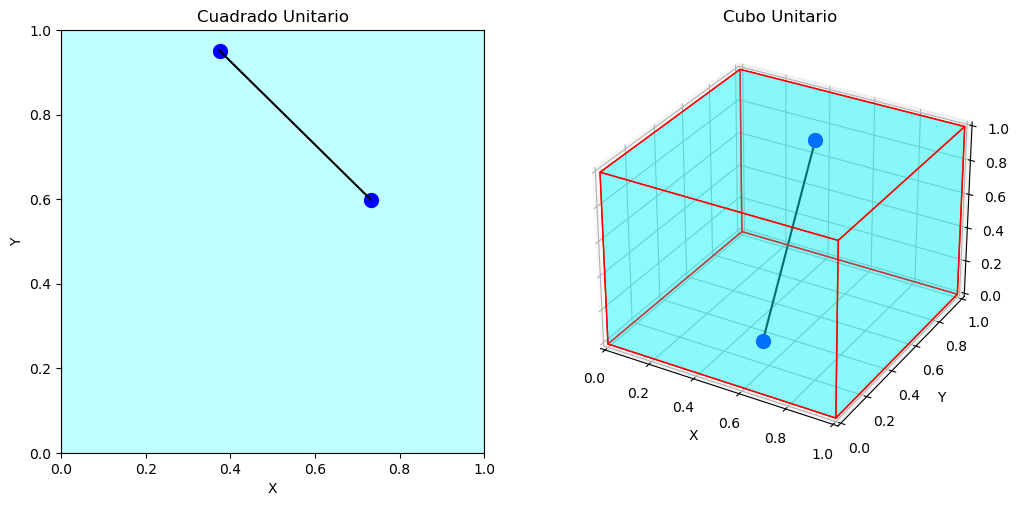

In [3]:
# Crear la figura y los ejes
fig = plt.figure(figsize=(12, 6))

# Cubo unitario
ax1 = fig.add_subplot(121)
draw_square(ax1)
ax1.set_title('Cuadrado Unitario')

# Cuadrado unitario
ax2 = fig.add_subplot(122, projection='3d')
draw_cube(ax2)
ax2.set_title('Cubo Unitario')

# Mostrar la figura
plt.show()

In [4]:
def distance_distribution(samples=1000, dim=2, seed = 42):
    np.random.seed(seed)
    
    distance_list = []
    for _ in range(samples):
        point1 = np.random.rand(dim)
        point2 = np.random.rand(dim)
        dist = math.dist(point1, point2)
        distance_list.append(dist)
        
    
    return distance_list

In [5]:
distances_dim2 = distance_distribution()
distances_dim3 = distance_distribution(1000, 3)
distances_dim4 = distance_distribution(1000, 4)
distances_dim5 = distance_distribution(1000, 5)

In [6]:
mean2 = np.mean(distances_dim2)
mean3 = np.mean(distances_dim3)
mean4 = np.mean(distances_dim4)
mean5 = np.mean(distances_dim5)

In [7]:
dist_dict = {
    'dim2': {'list': distances_dim2, 'mean': mean2},
    'dim3': {'list': distances_dim3, 'mean': mean3},
    'dim4': {'list': distances_dim4, 'mean': mean4},
    'dim5': {'list': distances_dim5, 'mean': mean5},
}

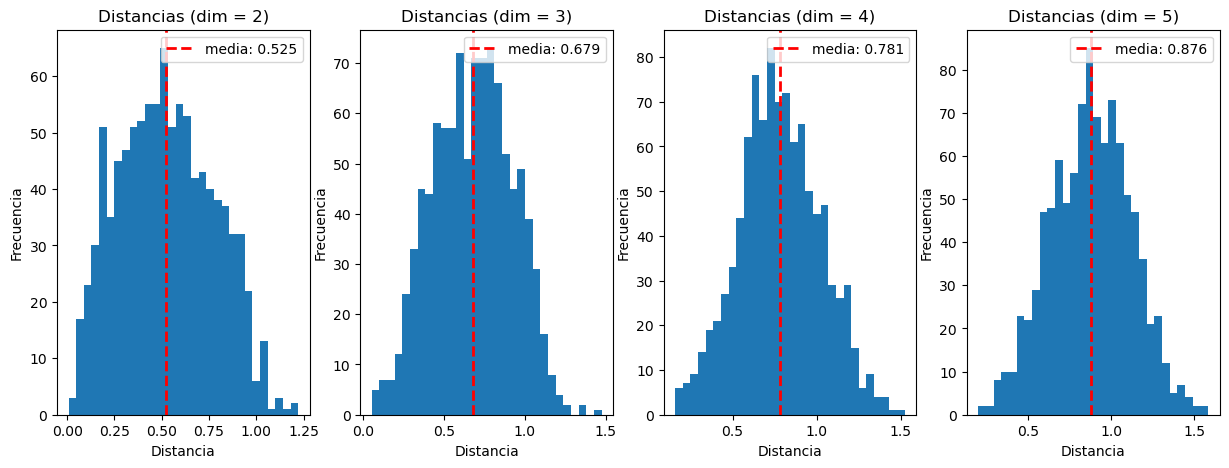

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

for i,dim in enumerate(dist_dict.keys()):
    
    distances_list = dist_dict[dim]['list']
    distances_mean = dist_dict[dim]['mean']
    distances_mean = np.round(distances_mean, 3)
    
    ax[i].hist(distances_list, bins=30)
    ax[i].axvline(distances_mean, 
                  color='red', 
                  linestyle='--', 
                  linewidth=2, 
                  label=f'media: {distances_mean}')
    ax[i].legend()
    title_text = f'Distancias (dim = {i + 2})'
    ax[i].set_title(title_text)
    ax[i].set_ylabel('Frecuencia')
    ax[i].set_xlabel('Distancia')

De manera general, sean $x_{1}$ y $x_{2}$ dos vectores aleatorios de dimensión $N$, y $D$ la distancia euclideana entre ambos vectores, puede demostrarse que $E\left[D \right] \approx \sqrt{N/6}$.

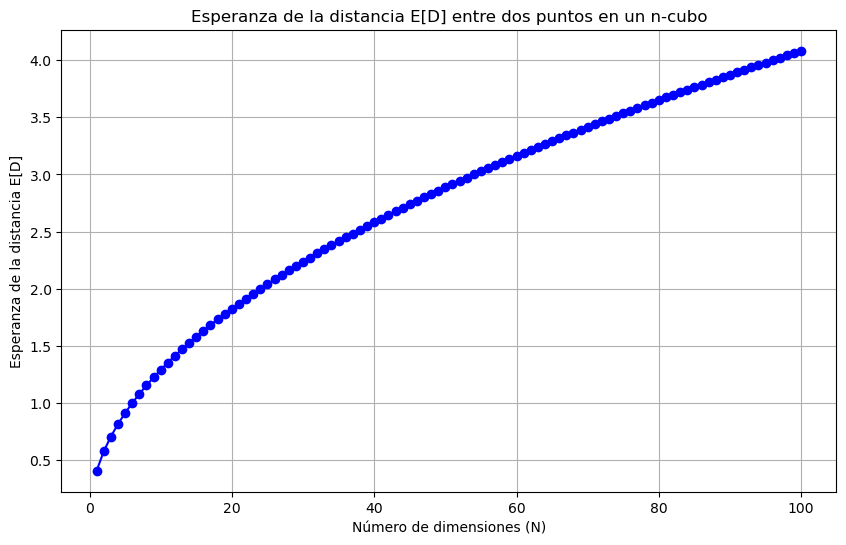

In [9]:
def expected_distance(n):
    return np.sqrt(n / 6)

# Número de dimensiones
dimensions = np.arange(1, 101)  # De 1 a 100 dimensiones
expected_distances = [expected_distance(n) for n in dimensions]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(dimensions, expected_distances, marker='o', linestyle='-', color='blue')
plt.title('Esperanza de la distancia E[D] entre dos puntos en un n-cubo')
plt.xlabel('Número de dimensiones (N)')
plt.ylabel('Esperanza de la distancia E[D]')
plt.grid(True)
plt.show()

**N.B:** Para un hipercubo de dimensión 1.000.000 el valor esperado es de aproximadamente 408,25.

El ejercicio anterior sirve para ilustrar que muchos aspectos se comportan de forma muy diferente en dimensiones altas. En consecuencia, matrices de datos con muchas columnas tienen el riesgo de ser muy dispersas, es decir, las filas ubicadas en un espacio N-dimensional van a encontrarse muy lejos entre sí. De esta manera, los datos de prueba se pueden encontrar muy alejados de los datos de entrenamiento, y por lo tanto, los máquinas de entrenamiento no van a generalizar bien.

<h2> Ejemplo 2: distancia al borde de un cuadrado </h2> 

Sea $\epsilon$ un número positivo y $d$ una variable aleatoria que representa la distancia de un punto a un borde del cuadrado, calculemos $P(d < \epsilon)$. Para calcular esta probabilidad seguiremos los siguientes pasos:

**Encontremos la proporción del cuadrado para el que $d < \epsilon$**

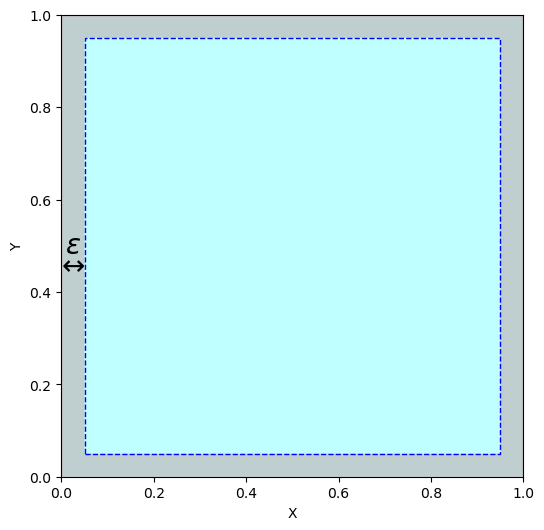

In [10]:
## import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 6))

# Definir los vértices del cuadrado exterior
outer_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
outer_vertices2 = np.array([[0, 0], [0, 1]])

# Definir los vértices del borde interior
margin = 0.05
inner_vertices = np.array([[margin, margin], [1 - margin, margin], [1 - margin, 1 - margin], [margin, 1 - margin]])
inner_vertices2 = np.array([[margin, margin], [margin, 1 - margin]])

# Crear el polígono del área roja (exterior menos el interior)
red_area_vertices = np.concatenate([outer_vertices, inner_vertices[::-1]])
red_area_vertices2 = np.concatenate([outer_vertices2, inner_vertices2[::-1]])

# Crear el polígono del área roja
red_area = plt.Polygon(red_area_vertices, closed=True, facecolor='red', alpha=0.25, edgecolor='none')
ax.add_patch(red_area)

red_area2 = plt.Polygon(red_area_vertices2, closed=True, facecolor='red', alpha=0.25, edgecolor='none')
ax.add_patch(red_area2)

# Crear el polígono del cuadrado exterior
poly2d = plt.Polygon(outer_vertices, facecolor='cyan', edgecolor='r', alpha=0.25)
ax.add_patch(poly2d)

# Crear el polígono del borde interior
inner_poly2d = plt.Polygon(inner_vertices, facecolor='none', edgecolor='b', linestyle='--')
ax.add_patch(inner_poly2d)

# Añadir el texto epsilon dentro del margen izquierdo
ax.text(0.025, 0.5, r'$\epsilon$', fontsize=20, va='center', ha='center', color='black', 
        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.5'))

# Añadir la flecha de dos lados debajo de la letra epsilon
ax.text(0.02, 0.46, r'$\leftrightarrow$', fontsize=20, va='center', ha='center', 
        color='black', bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.5'))

# Configurar los límites de los ejes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Añadir etiquetas a los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

# Mostrar la figura
plt.show()

Dado que el cuadrado tiene área 1, el área que enmarca el conjunto de puntos para los que $d < \epsilon$ es igual a $1 - (1 - 2 \epsilon)^{2}$, dónde $\epsilon \leq 1$.

**Calcular la probabilidad**

$$P(d < \epsilon) = \frac{1 - (1 - 2 \epsilon)^{2}}{1}$$

Para $\epsilon = 0.001$, esta probabilidad es aproximadamente igual a $0,4 \%$.

**Pensemos en dimensiones altas: ¿qué debemos cambiarle al ejercicio?**

Tenga en cuenta que el exponente al cuadrado en la fórmula de la probabilidad corresponde a la forma en que calculamo el área de un cuadrado ($\text{base } x \text{ altura})$, y, que esto coincide con la dimensión en la que estamos trabajando. Así, no es difícil concluir que para un N-cubo, la probabilidad de que un punto aleatorio se encuentre a menos de $\epsilon$ de un borde es igual a $1 - (1 - 2 \epsilon)^{N}$. Veamos esta probabilidad cómo se comporta conforme incrementa el número de dimensiones:

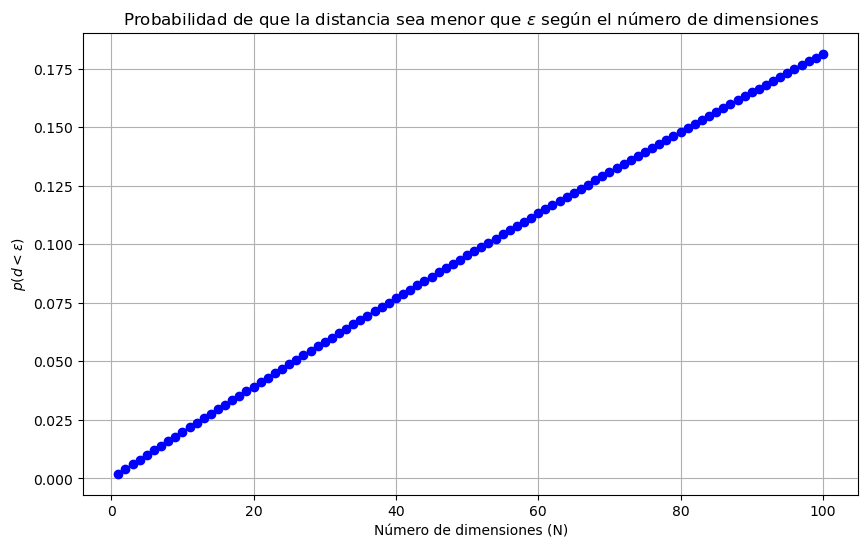

In [11]:
def probability(N, epsilon=0.001):
    return 1 - (1 - 2*epsilon)**N

# Número de dimensiones
dimensions = np.arange(1, 101)  # De 1 a 100 dimensiones
expected_distances = [probability(n) for n in dimensions]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(dimensions, expected_distances, marker='o', linestyle='-', color='blue')
plt.title('Probabilidad de que la distancia sea menor que $\epsilon$ según el número de dimensiones')
plt.xlabel('Número de dimensiones (N)')
plt.ylabel('$p(d < \epsilon)$')
plt.grid(True)
plt.show()

**N.B:** Para $N = 10.000$, $p(d < \epsilon) \approx 0,999999999$. De hecho

$$\lim_{N \rightarrow \infty} p(d < \epsilon) = 1 $$

<h3> ¿Qué podemos hacer para enfrentarnos a la maldición de la dimensionalidad? </h3>

Para enfrentar la maldición de la dimensionalidad existen varias estrategias y técnicas que consisten principalmente en encontrar una matriz con menos columnas que la matriz original, tal que no perdamos información relevante para el problema en cuestión.

1. **Reducción de Dimensión**
Se transforman los datos originales de alta dimensión en un espacio de menor dimensión, preservando la mayor cantidad de información relevante posible.

- **Análisis de Componentes Principales (PCA)**: PCA es una técnica que encuentra las direcciones principales (componentes principales) en las que varían los datos. Al proyectar los datos sobre estas componentes principales, se reduce la dimensionalidad al mismo tiempo que se retiene la mayor variabilidad posible.
- **Descomposición de Valor Singular (SVD)**: Similar a PCA, SVD descompone una matriz en tres matrices más simples y permite la reducción de dimensionalidad identificando las componentes más significativas.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: Técnica de reducción no lineal que preserva las relaciones locales y es útil para la visualización de datos en espacios de baja dimensión.
- **UMAP**: Técnica de reducción no lineal que preserva tanto relaciones locales como globales de los datos, y es útil tanto para visualización como para análisis de datos complejos.

2. **Selección de Características**
La selección de características implica elegir un subconjunto de las características originales que son más relevantes para el problema en cuestión.

- **Métodos de Filtrado**: Utilizan medidas estadísticas para evaluar la relevancia de cada característica individualmente, como la varianza, la correlación y el coeficiente de información mutua.
- **Métodos de Wrapper**: Evalúan la calidad de diferentes subconjuntos de características entrenando y validando un modelo de aprendizaje automático. Técnicas como la selección hacia adelante, hacia atrás y la eliminación recursiva de características (RFE) son ejemplos comunes.
- **Métodos Integrados**: Incorporan la selección de características dentro del propio algoritmo de aprendizaje. Modelos como los árboles de decisión y los modelos basados en regularización (Lasso, Ridge) tienen mecanismos incorporados para seleccionar características relevantes.

3. **Regularización**
La regularización añade un término de penalización al modelo para reducir su complejidad y evitar el sobreajuste.

- **L1 Regularization (Lasso)**: Promueve la sparsidad de las características, lo que significa que muchas de las características menos relevantes tendrán coeficientes cero, efectivamente eliminándolas del modelo.
- **L2 Regularization (Ridge)**: Penaliza los coeficientes grandes, reduciendo la variabilidad y la complejidad del modelo.

4. **Aumento de Datos**
En muchos casos, aumentar la cantidad de datos puede ayudar a mitigar la maldición de la dimensionalidad.

- **Generación de Datos Sintéticos**: Crear nuevos ejemplos de datos basados en el conjunto de datos existente mediante técnicas como el sobremuestreo (SMOTE) o el uso de modelos generativos.
- **Recolección de Más Datos**: Obtener más datos del dominio, si es posible, puede mejorar la densidad de los datos en el espacio de características.

<h3> Material adicional de lectura </h3>

- Capítulo 8 del libro Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflo, de Auélien Géron. Repositorio del libro: https://github.com/ageron/handson-ml3/

- Artículo Conceptualizing Curse of Dimensionality with Parallel Coordinates de G Devi , Charu Chauhan and Sutanu Chakraborti. Enlace al artículo: https://ojs.aaai.org/index.php/AAAI/article/view/9855